## <font color=red>注意：所有技術指標不可以使用網路上找到的Package（比如：TA-Lib），請自行撰寫。</font>

### 1. 
讀取 moodle中上傳的兩個 Excel檔案（TSMC.xlsx以及Delta.xlsx），請勿改Excel檔名<br>
檢視兩者的資料

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df1=pd.read_excel('TSMC.xlsx')
df1.head()

,Date,Open,High,Low,Close
0,2019/11/21,309.5,311.0,307.0,311.0
1,2019/11/20,314.0,314.0,312.0,313.5
2,2019/11/19,312.5,315.0,311.0,315.0
3,2019/11/18,308.5,311.0,307.0,311.0
4,2019/11/15,305.5,307.5,304.5,307.0


In [3]:
df2=pd.read_excel('Delta.xlsx')
df2.head()

,Date,Open,High,Low,Close
0,2019/11/21,135.5,137.5,135.0,137.5
1,2019/11/20,139.0,139.0,136.5,137.0
2,2019/11/19,137.0,139.5,136.0,139.5
3,2019/11/18,134.0,136.5,134.0,136.5
4,2019/11/15,134.0,135.0,133.0,133.5


### 2. 
（1）計算TSMC過去十年的日報酬率以及累計報酬率<br>（2）計算TSMC的5日與10日RSI值，並且繪製RSI和Close的走勢圖<br>（3）計算TSMC的MACD（使用預設12, 26, 9），並且繪製MACD和Close的走勢圖

In [4]:
#(1)日報酬率＝〔(本日收盤價／前一交易日收盤價)－１〕×100
for i in range(len(df1.index)-1):
    df1.loc[i,'daily_return(%)'] = ((df1.loc[i,'Close']/df1.loc[i+1,'Close'])-1)*100
    i+=1
df1.head()

,Date,Open,High,Low,Close,daily_return(%)
0,2019/11/21,309.5,311.0,307.0,311.0,-0.797448
1,2019/11/20,314.0,314.0,312.0,313.5,-0.476190
2,2019/11/19,312.5,315.0,311.0,315.0,1.286174
3,2019/11/18,308.5,311.0,307.0,311.0,1.302932
4,2019/11/15,305.5,307.5,304.5,307.0,1.153213


In [5]:
#(1)累計報酬率 =當時的市價去除以一開始投入的本金再減去 100％ (期末金額-期初本金)/期初本金
for i in range(len(df1.index)-1):
    df1.loc[i,'yearly_return(%)'] = ((df1.loc[i,'Close']/df1.loc[2213,'Close'])-1)*100
    i+=1
df1.head()

,Date,Open,High,Low,Close,daily_return(%),yearly_return(%)
0,2019/11/21,309.5,311.0,307.0,311.0,-0.797448,387.460815
1,2019/11/20,314.0,314.0,312.0,313.5,-0.476190,391.379310
2,2019/11/19,312.5,315.0,311.0,315.0,1.286174,393.730408
3,2019/11/18,308.5,311.0,307.0,311.0,1.302932,387.460815
4,2019/11/15,305.5,307.5,304.5,307.0,1.153213,381.191223


In [ ]:
#(2)計算TSMC的5日與10日RSI值，並且繪製RSI和Close的走勢圖

In [6]:
'''
相對強弱指標（Relative Strength Index）。
以某段時間，股價”平均漲幅”與”平均跌幅”所計算出來的數值，可看出股價觀測時間內股票價格強勢或弱勢的指標。
RSI = (上升平均數/(上升平均數+下跌平均數))×100
'''
def RSI(num, df):
    for i in range(len(df.index)-num):
        delta = df.loc[i:i+num-1, 'Close'].values - df.loc[i+1:i+num, 'Close'].values
        up = np.sum(delta[delta >= 0])
        down = abs(np.sum(delta[delta < 0]))
        f = up / (up + down) * 100
        df.loc[i, str(num)+'_RSI'] = f

In [7]:
#(2)計算TSMC的5日與10日RSI值，並且繪製RSI和Close的走勢圖
RSI_5=RSI(5, df1)
RSI_10=RSI(10, df1)
df1.head()

,Date,Open,High,Low,Close,daily_return(%),yearly_return(%),5_RSI,10_RSI
0,2019/11/21,309.5,311.0,307.0,311.0,-0.797448,387.460815,74.193548,53.448276
1,2019/11/20,314.0,314.0,312.0,313.5,-0.476190,391.379310,85.185185,54.385965
2,2019/11/19,312.5,315.0,311.0,315.0,1.286174,393.730408,88.461538,58.181818
3,2019/11/18,308.5,311.0,307.0,311.0,1.302932,387.460815,88.461538,57.407407
4,2019/11/15,305.5,307.5,304.5,307.0,1.153213,381.191223,55.555556,62.903226


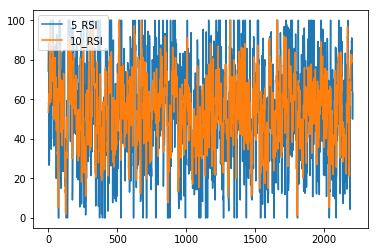

In [8]:
RSI_5= df1['5_RSI'].values
RSI_10= df1['10_RSI'].values
plt.plot(RSI_5, label = '5_RSI')
plt.plot(RSI_10, label = '10_RSI')
plt.legend(loc = 'upper left')

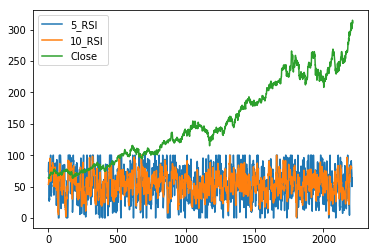

In [9]:
RSI_5= df1['5_RSI'].values
RSI_10= df1['10_RSI'].values
Close=df1['Close'][::-1].values
plt.plot(RSI_5, label = '5_RSI')
plt.plot(RSI_10, label = '10_RSI')
plt.plot(Close, label = 'Close')
plt.legend(loc = 'upper left')

In [10]:
# (3) 計算TSMC的MACD（使用預設12, 26, 9），並且繪製MACD和Close的走勢圖

In [11]:
''' 
EMA1 = Colse1
EMA1是今天的指數移動平均
EMA2
EMA2是昨天的指數移動平均，依此類推
price1=p1
price1=p1 是今日的價格
α
α是平滑係數，是小於1的參數。
alpha = 2/(N+1) ex n=12
EMA1=α×[p1+(1−α)×p2+⋯+(1−α)n−1×pn]
'''

' \nEMA1 = Colse1\nEMA1是今天的指數移動平均\nEMA2\nEMA2是昨天的指數移動平均，依此類推\nprice1=p1\nprice1=p1 是今日的價格\nα\nα是平滑係數，是小於1的參數。\nalpha = 2/(N+1) ex n=12\nEMA1=α×[p1+(1−α)×p2+⋯+(1−α)n−1×pn]\n'

In [12]:
def EMA(num, data):
    result = []
    alpha = 2 / (num+1)
    weight = alpha * np.logspace(0, num-2, num-1, base = 1-alpha) #1-alpha^0 ~ (1-alpha)^(num-2) 中間有num-1個數
    for i in range(len(data)-num+2):
        dat = data[i:i+num-1]
        result.append(np.dot(weight, dat))
    return np.array(result)

In [13]:
#(3)計算TSMC的MACD（使用預設12, 26, 9），並且繪製MACD和Close的走勢圖
df1['12_EMA'] = pd.Series(EMA(12, df1['Close']))
df1['26_EMA'] = pd.Series(EMA(26, df1['Close']))
df1['DIF'] = df1['12_EMA'] - df1['26_EMA']
df1['MACD'] = pd.Series(EMA(9, df1['DIF']))
df1.head()

,Date,Open,High,Low,Close,daily_return(%),yearly_return(%),5_RSI,10_RSI,12_EMA,26_EMA,DIF,MACD
0,2019/11/21,309.5,311.0,307.0,311.0,-0.797448,387.460815,74.193548,53.448276,260.106698,261.078258,-0.971560,-0.673718
1,2019/11/20,314.0,314.0,312.0,313.5,-0.476190,391.379310,85.185185,54.385965,259.855398,260.513019,-0.657621,-0.588548
2,2019/11/19,312.5,315.0,311.0,315.0,1.286174,393.730408,88.461538,58.181818,259.089389,259.737605,-0.648216,-0.530766
3,2019/11/18,308.5,311.0,307.0,311.0,1.302932,387.460815,88.461538,57.407407,257.810070,258.745114,-0.935044,-0.448609
4,2019/11/15,305.5,307.5,304.5,307.0,1.153213,381.191223,55.555556,62.903226,256.793857,257.952339,-1.158482,-0.278048


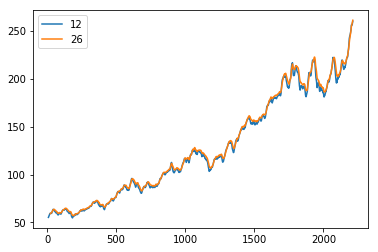

In [14]:
#date = df1['Date'].values
ema_12 = df1['12_EMA'].values
ema_26 = df1['26_EMA'].values
plt.plot(ema_12[::-1], label = '12')
plt.plot(ema_26[::-1], label = '26')
plt.legend(loc = 'upper left')
plt.show()

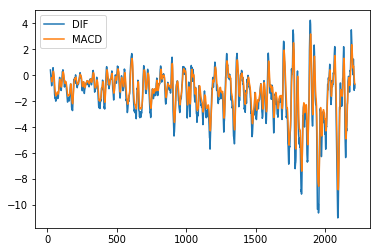

In [15]:
DIF = df1['DIF'].values
MACD= df1['MACD'].values
plt.plot(DIF[::-1], label = 'DIF')
plt.plot(MACD[::-1], label = 'MACD')
plt.legend(loc = 'upper left')
plt.savefig('MACD.png')

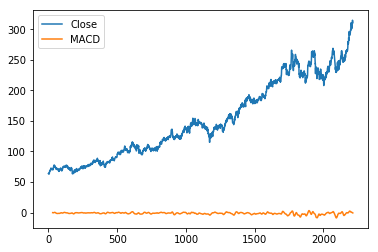

In [16]:
MACD= df1['MACD'].values
Close = df1['Close'].values
plt.plot(Close[::-1], label = 'Close')
plt.plot(MACD[::-1], label = 'MACD')
plt.legend(loc = 'upper left')

### 3.
資料：2308 Delta<br>
期間：2010/11/22~2019/11/21<br>
手續費：0.1425%<br>
證交稅：0.3%<br>
績效指標：（Output)
1. 淨利：累計總獲利(虧損)<br>
2. 年化報酬率：將累計報酬率做年化<br>
3. 交易次數：買進然後賣出算一次<br>
4. 交易成本：累計手續費與證交稅總和<br>
5. 勝率：交易獲利次數/總交易次數<br>
6. (平均獲利/平均虧損)：(正報酬率總和/獲利次數)除以(負報酬率總和/虧損次數)<br>

模擬以下交易策略進行歷史回測，並計算策略回測的各項績效指標(上述6項)，並且繪製（1）各均線及Close走勢圖 (2）累積損益圖。<br>
a. 當20MA向上交叉60MA時，以下一個交易日開盤價，買進並持有1張台達電。<br>
b. 當20MA向下交叉60MA時，以下一個交易日開盤價，賣出所持有的部位。

In [17]:
# n MA 前n日sum(colse)/n

def nma(nday,data):
    result = []
    for i in range(len(data)-nday):
        result.append(np.mean(data[i:i+nday]))
    return np.array(result)

In [18]:
df2['20_MA'] = pd.Series(nma(20, df2['Close']))    
df2['60_MA'] = pd.Series(nma(60, df2['Close']))    
df2.head()

,Date,Open,High,Low,Close,20_MA,60_MA
0,2019/11/21,135.5,137.5,135.0,137.5,137.125,139.241667
1,2019/11/20,139.0,139.0,136.5,137.0,137.225,139.425000
2,2019/11/19,137.0,139.5,136.0,139.5,137.250,139.633333
3,2019/11/18,134.0,136.5,134.0,136.5,137.100,139.808333
4,2019/11/15,134.0,135.0,133.0,133.5,137.075,140.066667


In [19]:
buy = []
sell = []
flag = True

for i in range(len(df2.index)-60, -1, -1):
    if df2['20_MA'][i] >= df2['60_MA'][i]:
        if flag:
            buy.append(i-1)
            flag = False
    else:
        if not flag:
            sell.append(i-1)
            flag = True
        
print(buy)
print(sell)

[2108, 1928, 1809, 1695, 1669, 1661, 1554, 1502, 1400, 1203, 1021, 895, 848, 694, 626, 447, 299, 96]
[2090, 1832, 1731, 1671, 1668, 1571, 1535, 1402, 1266, 1128, 974, 857, 774, 653, 603, 420, 128, 67]


In [20]:
buy_df = df2.iloc[buy]
sell_df = df2.iloc[sell]
buy_df.head()
sell_df.head()

,Date,Open,High,Low,Close,20_MA,60_MA
2090,2011/05/25,109.5,109.5,107.0,107.0,123.200,124.716667
1832,2012/06/06,79.3,82.3,78.1,80.4,86.720,87.870000
1731,2012/10/29,98.0,101.0,98.0,100.5,105.000,106.038333
1671,2013/01/22,106.5,107.0,104.5,107.0,105.175,105.230000
1668,2013/01/25,105.5,106.0,104.0,106.0,105.375,105.475000


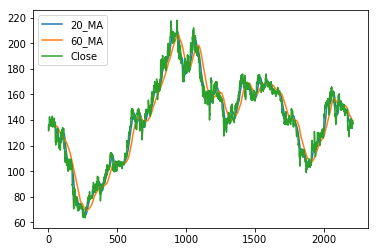

In [21]:
#(1)各均線及Close走勢圖
MA_20= df2['20_MA'].values
MA_60= df2['60_MA'].values
Close2=df2['Close'].values
plt.plot(MA_20[::-1], label = '20_MA')
plt.plot(MA_60[::-1], label = '60_MA')
plt.plot(Close2[::-1], label = 'Close')
plt.legend(loc = 'upper left')

In [22]:
#1.淨利：累計總獲利(虧損)
profit = df2['Open'][sell].values - df2['Open'][buy].values
print(np.sum(profit))

77.6


In [23]:
print(profit)

[-24.5   3.6   6.    0.5  -1.   28.   -9.   22.   26.    6.5  -3.    4.5
  12.   -1.   -6.5  -6.5  25.   -5. ]


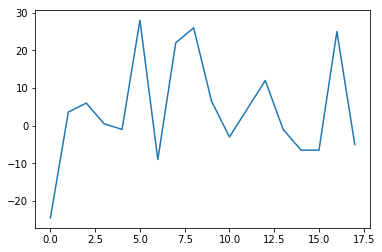

In [24]:
plt.plot(profit)

In [25]:
#2.年化報酬率：將累計報酬率做年化
((np.sum(profit) / df2.loc[buy[0], 'Open'] + 1) ** (1 / 9) - 1)*100

5.207245855031806

In [26]:
#3.交易次數：買進然後賣出算一次
len(buy),len(sell)

(18, 18)

In [27]:
#4.交易成本：累計手續費與證交稅總和

print(0.004425 * (sum(buy) + sum(sell)))

185.075625


In [28]:
#5.勝率：交易獲利次數/總交易次數
delta1 = df2['Open'][sell].values - df2['Open'][buy].values
print(len(delta1[delta1 > 0]) / len(delta1))

0.5555555555555556


In [29]:
#6.(平均獲利/平均虧損)：(正報酬率總和/獲利次數)除以(負報酬率總和/虧損次數)

(sum(delta1[delta1 > 0]) / len(delta1[delta1 > 0])) / (abs(sum(delta1[delta1 < 0])) / len(delta1[delta1 < 0]))

1.8987610619469026

In [30]:
'''
資料：2308 Delta
期間：2010/11/22~2019/11/21
手續費：0.1425%
證交稅：0.3%
績效指標：（Output)
'''

'\n資料：2308 Delta\n期間：2010/11/22~2019/11/21\n手續費：0.1425%\n證交稅：0.3%\n績效指標：（Output)\n'